## Interactive race model for stop signal task

based on Gordon Logan's interactiverace.m

In [2]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline


In [7]:
# original matlab code

#function [meanrtgo,presp] = interactiverace

#rng('shuffle');
params={'mugo':.2,
        'mustop':.5,
        'threshold':60,
        'nondecisiongo':50,
        'nondecisionstop':50,
        'ssds':[100,200,300,400,500,3000],
        'nreps':1000,
        'maxtime':1000}

def interactiverace(params):
    
    meanrtgo = numpy.zeros(len(params['ssds']))
    presp = numpy.zeros(len(params['ssds']));
 
    for irep in range(params['nreps']):
        for j,ssd in enumerate(params['ssds']):
            stopsignaldelay = ssd
            goaccumulator = 0
            stopaccumulator = 0
            rtgo = 0
            itime = 0
            while itime < params['maxtime'] and rtgo == 0: # single trial
                itime = itime + 1
                if itime < stopsignaldelay + params['nondecisionstop']:
                    inhibition = 0
                else:
                    inhibition = 1
                    stopaccumulator = stopaccumulator + params['mustop'] + numpy.random.normal()
                if itime >= params['nondecisiongo']:
                    goaccumulator = goaccumulator + params['mugo'] - inhibition*stopaccumulator + numpy.random.normal()

                if goaccumulator > params['threshold']:
                    if rtgo == 0:
                        rtgo = itime;
            meanrtgo[j] += rtgo;
            if rtgo > 0:
                presp[j] += 1;

    for ssd in range(len(params['ssds'])):
        if presp[ssd] > 0:
            meanrtgo[ssd] = meanrtgo[ssd]/presp[ssd];
        presp[ssd] = presp[ssd]/params['nreps'];
    return(meanrtgo,presp)

meanrtgo,presp=interactiverace(params)
print(meanrtgo)
print(presp)

[163.         234.62992126 295.57766143 331.51399776 343.31472081
 348.623     ]
[0.01  0.127 0.573 0.893 0.985 1.   ]


[100, 500, 0, 1]

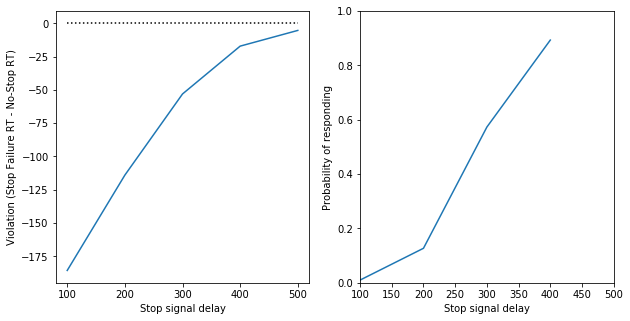

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:5],meanrtgo[:5] - meanrtgo[5])
plt.plot([params['ssds'][0],params['ssds'][4]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:4],presp[:4])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][4],0,1])


array([-185.623     , -113.99307874,  -53.04533857,  -17.10900224,
         -5.30827919])